# <span style="color:royalblue"> [6주차] 2024 Beginning of AUTO ML </span> 
# 2024 회귀분석에서 파이캐럿 사용하기

--- 

<div style="text-align: right"> Final Edition : 2024.2.4<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

# [이론 및 원리] 

# AUTO ML(Automated machine learning) 이란?

자동화된 기계 학습(AutoML)은 기계학습을 실제 문제에 적용하는 작업을 자동화하는 프로세스.   
AutoML에는 원시 데이터 세트에서 시작하여 배포 준비가 된 머신 러닝 모델 구축에 이르기까지 모든 단계를 자동화

1. 코드 없이 최소한의 전문 지식만 필요로 하는 모델 학습
2. 커스텀 모델링에 필요한 코드는 80% 줄어 많은 모델을 빠르게 배포
2. 모델 유지보수의 복잡성을 없애준다.

* REF : [Google Auto ML Vertex AI](https://cloud.google.com/automl/?utm_source=google&utm_medium=cpc&utm_campaign=japac-KR-all-en-dr-bkws-all-all-trial-e-dr-1009882&utm_content=text-ad-none-none-DEV_c-CRE_529584147727-ADGP_Hybrid%20%7C%20BKWS%20-%20EXA%20%7C%20Txt%20~%20AI%20%26%20ML%20~%20AutoML_Global%20gap%20analysis-KWID_43700060660221055-aud-970366092687%3Akwd-957502443240&userloc_1009846-network_g&utm_term=KW_google%20auto%20ml&gclid=Cj0KCQiA0p2QBhDvARIsAACSOOP5qFGyTfVkDUbKMJbIjwjk9qNJ4nOAeLcEh_d26UNSaWPuovCLcd8aAmv4EALw_wcB&gclsrc=aw.ds)

![autoML](./data/googleautoml.png)

  Reference : Regression Tutorial (REG101) [파이캐럿 홈페이지](https://pycaret.gitbook.io/docs/).    [파이캐럿 깃허브](https://github.com/pycaret/pycaret).    [회귀분석 튜토리얼](https://www.pycaret.org/tutorials/html/REG101.html).

# 1.0  개요

최근에는 UI/UX 를 고려해 시간을 단축하고 생산성을 높이는 AUTO ML 개발이 업계 트렌드입니다.  
파이캐럿은 수백줄의 머신러닝 코드를 단 몇 줄로 바꿔내는 AUTO ML 오픈소스 머신러닝 라이브러리 입니다.  

[파이캐럿 활용순서]
- 데이터 가져오기(**Getting Data**): PyCaret 저장소에서 데이터를 가져오는 방법  
- 환경 설정(**Setting up Environment**): PyCaret에서 실험을 설정하고 회귀 모델 구축을 시작하는 방법  
- 모델 생성(**Create Model**): 모델 생성, 교차 검증 수행 및 회귀 메트릭 평가 방법  
- 모델 조정(**Tune Model**): 회귀 모델의 하이퍼 매개변수를 자동으로 조정하는 방법  
- 플롯 모델(**Plot Model**): 다양한 플롯을 사용하여 모델 성능을 분석하는 방법  
- 모델 완성(**Finalize Model**): 실험이 끝날 때 최상의 모델을 완성하는 방법  
- 예측 모델(**Predict**): 새로운/보이지 않는 데이터에 대한 예측 방법  
- 모델 저장/불러오기(**Save / Load Model**): 나중에 사용하기 위해 모델을 저장/불러오는 방법  

## 1.1 파이캐럿 설치 Installing PyCaret

**python version : 3.8**(최신 버전인 3.9는 지원이 안됩니다)  
!pip install pycaret으로 설치한 후 커널을 종료하고, 제대로 설치되지 않으면 두 번째로 다시 입력하면 그 다음부터는 문제없이 실행

파이캐럿 버전  Created using: PyCaret 2.2.  Date Updated: November 25, 2020

In [4]:
### Installing PyCaret in Local Jupyter Notebook
# !pip install --user pycaret
# !conda install -c conda-forge pycaret

## 1.2 환경설정 Pre-Requisites
- Python 3.6 or greater
- PyCaret 2.0 or greater
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Regression

## 1.3 코랩 사용자 For Google Colab Users:
Google colab에서 이 노트북을 실행하는 경우 노트북 상단에서 다음 코드를 실행하여 대화형 시각적 개체를 표시합니다<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

# 2.0 회귀분석이란 What is Regression?

회귀 분석은 종속 변수(Y값)와 하나 이상의 독립 변수(Y에 영향을 주는 X들) 간의 관계를 추정하기 위한 일련의 통계 프로세스입니다.   
머신 러닝에서 회귀의 목적은 판매량, 수량, 온도 등과 같은 연속적인 값을 예측하는 것입니다  

# 3.0 파이캐럿 회귀모듈 Overview of the Regression Module in PyCaret
PyCaret의 회귀 모듈(pycaret.regression)은 다양한 기술과 알고리즘을 사용하여 연속 값/결과를 예측하는 데 사용되는 지도 머신 러닝 모듈  
회귀는 판매, 판매 단위, 온도 또는 연속적인 숫자와 같은 값/결과를 예측하는 데 사용할 수 있습니다.

PyCaret의 회귀 모듈에는 모델의 성능을 분석하기 위한 25개 이상의 알고리즘과 10개의 플롯이 있습니다.  
하이퍼 매개변수 조정, 앙상블 또는 스태킹과 같은 고급 기술이든 PyCaret의 회귀 모듈에는 모든 것이 있습니다.

# 4.0 튜토리얼 데이터 셋 Dataset for the Tutorial

# 5.0 데이터 가져오기 Getting the Data

get_data()기능을 사용하여 샘플 데이터를 로드할 수 있습니다(인터넷 연결이 필요함)

In [1]:
import pickle
with open( "월별부동산데이터_2023", "rb" ) as file:
    raw_df = pickle.load(file)

In [2]:
raw_df

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price(만원)
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0,59892
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0,59568
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0,59440
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0,57388
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0,57403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,95.993766,81.438153,834.0,2111.0,5.33,14283.91,309.226,5.217343,654.0,657.32,27610.128,20717.1,227000.0,142613
2023-09-01,96.624532,81.770394,408.0,373.0,5.33,14031.81,311.255,5.008782,698.0,657.32,27610.128,20662.8,229000.0,143692
2023-10-01,97.045327,82.233577,2071.0,2105.0,5.33,13219.32,313.276,4.931956,676.0,657.32,27938.831,20609.8,209000.0,144485
2023-11-01,97.245942,82.808694,937.0,531.0,5.33,13061.47,313.276,4.730629,615.0,657.32,27938.831,20600.9,220000.0,144875


In [3]:
raw_df.columns

Index(['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA', 'gangnam_price(만원)'],
      dtype='object')

In [4]:
# 칼럼명(변수명)을 한글로 바꿔줍니다.
raw_df.columns=['price_idx', 'rent_idx', 'permission', 'presale','DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA', 'gangnam_price']

In [5]:
dataset = raw_df

In [6]:
dataset.head()

,price_idx,rent_idx,permission,presale,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0,59892
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0,59568
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0,59440
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0,57388
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0,57403


In [7]:
#check the shape of data
dataset.shape

(132, 14)

**훈련(Train)과 평가(Test) 데이터로 분할(Split)**  
예측모델을 만들때는 훈련 데이터만을 가지고 학습하고, 그 모델에 평가 데이터 14개를 넣어서 모델의 성능을 평가할 예정입니다.

- 훈련 데이터 124개
- 평가 데이터 14개


In [8]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('모델링에 사용한 Train Data shape : ' + str(data.shape))
print('모델평가에 사용할 Test Data shape : ' + str(data_unseen.shape))

모델링에 사용한 Train Data shape : (119, 14)
모델평가에 사용할 Test Data shape : (13, 14)


# 6.0 환경설정 Setting up Environment in PyCaret

**setup()함수**
pycaret에서 환경을 초기화하고 변환 파이프라인을 생성하여 모델링 및 배포를 위한 데이터를 준비합니다.   
*제일 먼저 해야할 일* setup()은 pycaret에서 다른 함수를 실행하기 전에 호출해야 합니다.   

pandas 데이터 프레임(data)과 예측 열이름(target)이라는 두 가지 필수 매개변수가 필요합니다.  
다른 모든 매개변수는 선택 사항이며 사전 처리 파이프라인을 사용자 지정하는 데 사용됩니다.

PyCaret의 추론 알고리즘은 특정 속성을 기반으로 모든 기능에 대한 데이터 유형을 자동으로 추론합니다.(그래도 확인필요)

이를 설명하기 위해 PyCaret setup() 실행된 후 기능과 추론된 데이터 유형이 포함된 테이블을 표시합니다.  
모든 데이터 유형이 올바르게 식별 <span style="color:red">**enter** </span> 되면 계속 누르거나 quit입력하여 실험을 종료할 수 있습니다.  

모든 기계 학습 실험에 필수적인 몇 가지 사전 처리 작업을 자동으로 수행하기 때문에  
데이터 유형이 올바른지 확인하는 것은 PyCaret에서 근본적으로 중요합니다.  
이러한 작업은 데이터 유형마다 다르게 수행되므로 올바르게 구성하는 것이 매우 중요합니다.  

numeric_features, categorical_features매개변수를 사용하여 PyCaret의 유추된 데이터 유형 변경가능

**원하는 Task에 따라 모듈 선택**
 - 회귀 pycaret.regression
 - 분류 pycaret.regression
 - 군집 pycaret.clustering
 - 자연어처리 pycaret.nlp

In [13]:
# !pip install --user scikit-learn==0.23.2
# !pip install --user scikit-plot
# !pip install --user scikit-learn scipy matplotlib
# !python --version
# !pip install --user pycaret
# !pip install --user markupsafe==2.0.1

### 1.setup()함수 
 - 데이터 유형 인식, 전처리 함수   
 - data = 데이터셋,  
 - targer = Target 칼럼 입력,  
 - train_size 옵션 : train 데이터셋의 크기 지정  
 - ignore_features=['칼럼명'] : 제외하고 싶은 칼럼  
 - session_id : random state와 같은 개념

**데이터 유형 확인**

- 데이터 유형이 맞다면 Enter 키를 눌러주세요
- 데이터 유형을 변경하고 싶다면, quit을 입력하여 중지한후,   
- setup의 매개변수로 categorical_features=['칼럼명'] 혹은 numeric_features=['칼럼명']을 넣고 다시 실행

In [9]:
from pycaret.regression import*
exp_reg101 = setup(data = data, target = 'gangnam_price', session_id=123)  # 데이터, 타겟y값, 재현을 위한 session_id 임의로 설정

,Description,Value
0,Session id,123
1,Target,gangnam_price
2,Target type,Regression
3,Original data shape,"(119, 14)"
4,Transformed data shape,"(119, 14)"
5,Transformed train set shape,"(83, 14)"
6,Transformed test set shape,"(36, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [20]:
# !pip install --user jinja2==3.0

### 노란색과 초록색의 의미

- (노랑) 확인이 필요한 부분, 결과요약(하이라이트 개념)  
- (초록)결측치 등을 자동으로 대체 해줌

### 기본설정 정보

- **0. session_id**  
  나중에 재현할 수 있도록 모든 기능에서 시드로 배포되는 의사 난수입니다. no session_id가 전달되면 모든 함수에 배포되는 임의의 숫자가 자동으로 생성됩니다. 본 실험에서는 추후 재현성 session_id을 위해 설정 하였다.123  
- **3. Original Data**  
  데이터셋의 원본 형태를 표시합니다. 이 실험에서(5400, 8)은 5400개의 샘플과 대상 열을 포함하여 8개의 기능을 의미합니다. 
- **4. Missing Values**  
  원본 데이터에 결측값이 있는 경우 True로 표시됩니다. 이 실험의 경우 데이터세트에 누락된 값이 없습니다.  
- **5. Numeric Features**  
  숫자로 추론된 변수의 수. 이 데이터에서는 8개 변수 중에서 1개가 숫자로 추론  
- **6. Categorical Features**  
  범주형으로 추론된 변수의 수. 이 데이터에서는 8개 변수 중에서 6개가 범주형으로 추론  

### High Cadinality

- **Cadinality란?** 범주형 데이터에서 같은 값이 드문 정도  
   *예를 들어 생년월일, 주민등록번호는 중복값이 없으므로 Cadinality가 높다*  
   반면 성별, 이름은 중복되는 값이 많으므로  Cadinality가 낮다  
   주민등록번호>생년월일>이름>성별 순으로 Cadinality가 높다  

- *[실무지식]  
   트리 모델에서 high cardinality categorical features(범주의 갯수가 많은 변수)를 ONe-Hot Encoding을 하여 모델에 넣게 되면  
   트리가 언밸런스(한쪽으로 치우침), 트리가 깊어지는 문제 발생. 즉 소요시간 증가 및 과적합될 위험 발생*

### 학습과 검증 데이터 분할
- **11. Transformed Train Set**  
  변형된 훈련 세트의 형태를 표시합니다. 
  변환된 기차 세트에 대해 (5400, 8)의 원래 모양이 (3779, 28)로 변환됨을 주목.
  범주형 인코딩으로 인해 변수의 수가 28개에서 8개로 증가  
- **12. Transformed Test Set**  
  변환된 테스트/홀드아웃 세트의 모양을 표시합니다.  3779(70%) + 1621(30%) = 5400
  테스트/홀드아웃 세트에 1621개의 샘플이 있습니다. 
  이 분할은 설정에서 매개변수를 사용하여 변경할 수 있는 기본값인 70/30을 기반으로 합니다.  
- **결측값 대체**  
  이 경우 훈련 데이터에는 결측값이 없지만 아직 보이지 않는 데이터에 대해서는 대체가 필요
  범주형 인코딩 등과 같이 모델링을 수행하는 데 필수적인 몇 가지 작업이 자동. 대부분의 매개변수 in setup()은 선택 사항. 
  사전 처리 파이프라인을 사용자 지정하는 데로 가능

### 피처 엔지니어링
- 머신 러닝 실험에서 데이터의 차이점을 설명하는 데 있어 산술 연산을 통해 두 개의 특성을 조합하는 것이 같거나   
  두 개의 특성을 단독으로 사용하는 것보다 더 중요하다는 것을 종종 볼 수 있습니다.   
- 기존 기능의 상호 작용을 통해 새로운 기능을 생성하는 것을 기능 상호 작용이라고 합니다.   
- PyCaret_ Interaction 및 feature_ ratio 매개변수의 설정에서 기능을 사용할 수 있습니다.   

**Feature_Interaction**
- 피처 상호작용은 두 변수(a*b)를 곱하여 새로운 피처를 생성  

**feature_ ratio**
- 피처 비율은 기존 피처의 비율(a/b)을 계산하여 새로운 피처를 생성합니다.  

### [다중 공선성(Collinearity)](https://medium.com/future-vision/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168)

회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제  
분산팽창요인(Variance Inflation Factor,VIF)를 구하여 이 값이 10을 넘는다면 보통 다중공선성 존재

[해결방안]
1. 상관관계가 높은 독립변수중 하나 혹은 일부를 제거한다.
2. 변수를 변형시키거나 새로운 관측치를 이용한다.
3. 자료를 수집하는 현장의 상황을 보아 상관관계의 이유를 파악하여 해결한다.
4. 주성분 분석(PCA, Principle Component Analysis)를 이용한 diagonal matrix의 형태로 공선성을 없애준다.

# 7.0 모든 모델 비교 Comparing All Models

성능을 평가하기 위해 모든 모델을 비교하는 것은 Setup()이 완료된 후 모델링을 위한 시작점입니다  
(필요한 모델의 종류를 정확히 아는 경우가 아닌 경우가 많음). 

이 함수는 모델 라이브러리의 모든 모델을 훈련하고 메트릭 평가를 위해 kfold 교차 검증을 사용하여 점수를 매깁니다.   
출력은 모델 라이브러리에서 사용 가능한 모든 모델의 폴드(기본적으로 10개)에 걸쳐   
평균 MAE, MSE, RMSE, R2, RMSLE 및 MAPE를 표시하는 스코어 그리드를 인쇄합니다.

**[평가지표](https://steadiness-193.tistory.com/277)**  
각 평가지표에 대한 이해가 필요합니다
- R2 : 분산 기반으로 상대성능을 예측. 다른 지표와는 다르게 1에 가까울수록 좋다.
- RMSLE : RMSE 값에 log를 씌워준 값
1. 아웃라이어에 덜 민감하다(robust). 아웃라이어가 있더라도 값의 변동폭이 크지 않다.
2. 상대적 Error 측정. 데이터의 값의 절대적 크기가 커지면 RMSE의 값도 커지지만, RMSLE는 상대적 크기가 동일하다면 RMSLE의 값도 동일하다.
3. Under Estimation에 큰 패널티를 부여. 예측값이 실제값보다 작을 경우 더 큰 패널티를 부여한다.
  예) 집값이 떨어진다고 예측했는데, 급등했을 경우(예측값<실제값) : 더 큰 패널티(상대적 박탈감)
      집값이 오른다고 예측 했는데, 급락하는 경우(예측값>실제값) : 더 작은 패널티(영끌족의 불안감)
- MAPE :   
  MAE가 아웃라이어에 민감하다면, MAPE는 아웃라이어에 덜 민감하다(robust). (예측값-실제값) 을 (실제값) 으로 나눠 오차의 비율을 산정
  예) 생성한 모델이 100개의 데이터에 대해 실제 10억이 집값을 평균적으로 9.9억원으로 예측하였지만, 펜트하우스 100억을 10억으로 예측했다면,     
  
  <BR>  
  MAE의 경우, 오차의 절대치는 100억-10억=90억으로. 이 단 하나의 값에 의해 평가지표가 왜곡되는 현상 발생. {90+(1X99)} / 100 = 1.89
  MAPE의 경우, (100억-10억)/100억 = 0.9 로 하나의 값 생성. 나머지 99개 데이터에 대해 (10-9.9)/10 = 0.01 X 99개 = 0.99 + 0.9 = 1.08

![evaluation](./data/eval.png)

**평가지표 추가**  
add_metric()함수를 통해 평가지표 추가 가능합니다.(아래 예시)  

In [ ]:
# from sklearn.metrics import log_loss  
# add_metric('logloss','LogLoss',log_loss,greater_is_better=False,target='pred_proba')

In [ ]:
# 베스트 모델을 비교 할 수 있습니다.
# 아래에서는 catboost 모델이 가장 강력하네요
# 추가로 교차검증 k-fold, 내림차순 기준 평가지표, 제외할 모델 등을 설정 가능
# best = compare_models(fold=5, sort='logloss', n_select=3, exclude=['svm','ridge'])
# n_select=2는 가장 좋은 모델 3개를 선택하겠다는 의미, svm과 ridge 모델은 predict_proba예측 백분율값 미지원

In [10]:
best = compare_models(exclude = ['ransac']) # Random Sample Consensus 모델을 포함하고 싶지 않을때(예시)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,704.6356,1049271.6165,963.2697,0.9989,0.0094,0.0071,0.0400
lr,Linear Regression,912.4744,1316476.9939,1117.6365,0.9986,0.0132,0.0106,0.4020
lasso,Lasso Regression,909.2305,1294668.6969,1106.8566,0.9986,0.0131,0.0105,0.4100
ridge,Ridge Regression,904.4198,1297440.0314,1108.5355,0.9986,0.0131,0.0105,0.0090
en,Elastic Net,995.5662,1529354.3490,1204.4999,0.9984,0.0149,0.0116,0.0080
llar,Lasso Least Angle Regression,1013.4956,1567673.3420,1230.0885,0.9984,0.0151,0.0118,0.0090
rf,Random Forest Regressor,938.0620,1898436.7863,1288.9388,0.9979,0.0138,0.0101,0.0580
gbr,Gradient Boosting Regressor,1093.5232,2759421.4399,1540.1819,0.9970,0.0157,0.0115,0.0210
ada,AdaBoost Regressor,1759.9547,5599343.1388,2219.6404,0.9937,0.0237,0.0194,0.0210
dt,Decision Tree Regressor,1609.1694,6966141.7556,2322.9614,0.9928,0.0225,0.0162,0.0100


위와 같이 2개의 간단한 코드로 10겹 FOLD 교차 검증을 사용하여 22개 이상의 모델을 생성하고 가장 일반적으로 사용되는 6개의 회귀 메트릭(MAE, MSE, RMSE, R2, RMSLE 및 MAPE)을 평가했습니다. 
  
위에 인쇄된 점수 표는 비교 목적으로만 가장 실적이 좋은 지표를 강조 표시합니다. 
기본적으로 그리드는 매개변수 R2를 전달하여 변경할 수 있는 (최고에서 최저)를 사용하여 정렬 sort됩니다. 

예를 들어 compare_models(sort = 'RMSLE')그리드는 RMSLE에 따라 정렬됩니다(낮을수록 좋으므로 낮을수록 높음). 

fold 매개변수를 기본값 10에서 다른 값으로 변경하려면 매개변수를 사용할 수 있습니다. 예를 들어 compare_models(fold = 5)5겹 교차 검증에서 모든 모델을 비교합니다. 

접는 횟수를 줄이면 훈련 시간이 단축됩니다.

# 8.0 모델 생성 Create a Model

위에서 compare_models()을 통해 대략적인 모델별 평가성능을 확인하는 것으로 시작했습니다. 하지만 그것들은 일반적인 모델들이지 우리 데이터에 완벽히 훈련된 모델을 반환한 것은 아닙니다.(iteration 등 일정)

PyCaret에서 권장하는 실험 워크플로는 compare_models()설정 직후 사용하여 최고 성능 모델을 평가하고 지속적인 실험을 통해 몇 가지 후보를 확정하는 것

따라서 개별 모델에 대해 create_model()로 생성하여 반복 학습을 시켜줌.
이 함수는 모델을 만들고 계층화된 교차 검증을 사용하여 점수를 매깁니다. 

compare_models()출력은 MAE, MSE, RMSE, R2, RMSLE 및 MAPE를 k-flod로 표시하는 스코어 그리드를 인쇄합니다.

AdaBoost 회귀 분석기('ada')
라이트 그라디언트 부스팅 머신('lightgbm')
의사결정 트리('dt')

In [11]:
# PyCaret의 모델 라이브러리에 있는 25개의 회귀모델을 확인해봅니다.
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### 8.0 최소 각도 Lasso 회귀분석 LLAR(Lasso Least Angle Regression)

관측치의 수에 대비 해서 예측변수의 수가 상대적으로 많을 때 사용
[사이킷런](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html)

In [12]:
llar = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,853.4349,950201.7261,974.7829,0.9988,0.0101,0.0092
1,919.7387,1311750.5457,1145.3168,0.9989,0.0123,0.0098
2,1161.7075,2336185.3863,1528.4585,0.9969,0.0183,0.0130
3,841.5820,900622.0183,949.0111,0.9992,0.0142,0.0115
4,935.0117,1204644.3085,1097.5629,0.9990,0.0123,0.0103
5,967.0479,1732683.1259,1316.3142,0.9985,0.0179,0.0116
6,1319.4434,2386387.0832,1544.7935,0.9978,0.0208,0.0166
7,648.2568,813567.6744,901.9799,0.9978,0.0098,0.0082
8,1222.0879,2056164.2292,1433.9331,0.9982,0.0155,0.0134


In [13]:
print(llar)

LassoLars(random_state=123)


### 8.1 에이다 부스트 회귀모델  AdaBoost Regressor

In [14]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2837.2227,14640414.2225,3826.2794,0.9819,0.0420,0.0325
1,2367.8611,7738225.0146,2781.7665,0.9938,0.0269,0.0233
2,2390.0808,10202514.4654,3194.1375,0.9866,0.0318,0.0244
3,1035.1120,1562513.2225,1250.0053,0.9986,0.0175,0.0136
4,991.8342,1882756.7728,1372.1358,0.9985,0.0140,0.0105
5,1486.2677,3110648.4457,1763.7030,0.9972,0.0167,0.0146
6,1621.6478,3764246.6350,1940.1667,0.9965,0.0201,0.0178
7,1492.0811,2954972.1260,1719.0032,0.9921,0.0276,0.0232
8,1041.9631,2533798.6533,1591.7910,0.9978,0.0135,0.0105


In [15]:
print(ada)

AdaBoostRegressor(random_state=123)


### 8.2 라이트 GRM 모델 Light Gradient Boosting Machine 

In [16]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3017.5082,12069913.5726,3474.1781,0.9851,0.0363,0.0328
1,2833.8471,13061031.8141,3614.0050,0.9895,0.0290,0.0239
2,1379.9853,2999457.1607,1731.8941,0.9961,0.0189,0.0152
3,1308.7268,2704036.7045,1644.3955,0.9976,0.0244,0.0179
4,4764.0116,27169998.6905,5212.4849,0.9780,0.0564,0.0527
5,2037.8398,6616538.3218,2572.2633,0.9941,0.0209,0.0182
6,2386.7229,9931385.3523,3151.4101,0.9908,0.0289,0.0240
7,1491.9860,2910516.7713,1706.0237,0.9922,0.0254,0.0218
8,1856.0630,5059550.5395,2249.3445,0.9955,0.0249,0.0205


### 8.3 의사결정트리 모델 Decision Tree

In [17]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2107.0000,14465365.2222,3803.3361,0.9822,0.0402,0.0230
1,1766.4444,8180187.7778,2860.1028,0.9934,0.0215,0.0142
2,2523.0000,11982670.5556,3461.5994,0.9843,0.0334,0.0256
3,847.8750,1547124.1250,1243.8344,0.9986,0.0183,0.0113
4,604.8750,562751.1250,750.1674,0.9995,0.0096,0.0072
5,938.2500,1427742.7500,1194.8819,0.9987,0.0092,0.0077
6,1679.2500,6490059.0000,2547.5594,0.9940,0.0256,0.0186
7,775.5000,869697.5000,932.5757,0.9977,0.0115,0.0102
8,1329.0000,3642955.2500,1908.6527,0.9968,0.0195,0.0136


모든 모델의 평균 점수는 노란색으로 인쇄된 점수입니다.   
compare_models()fold 매개변수를 기본값인 10에서 다른 값으로 변경하려는 경우 매개변수를 사용할 수 있습니다.  
예: create_model('dt', fold = 5)5중 교차 검증을 사용하여 의사 결정 트리를 생성

# 9.0 모델 튜닝 Tune a Model

함수를 사용하여 모델을 생성할 때 create_model()기본 하이퍼파라미터를 사용합니다. 하이퍼파라미터를 조정하기 위해 tune_model()함수가 사용됩니다. 
  
이 기능은 미리 정의된 검색 공간에서 모델의 하이퍼파라미터를 자동으로 조정하고 kfold 교차 검증을 사용하여 점수를 매깁니다. 출력은 MAE, MSE, RMSE, R2, RMSLE 및 MAPE를 접기로 표시하는 점수 표를 인쇄합니다.
  
참고: tune_model() 훈련된 모델 객체를 입력으로 사용하지 않습니다. 대신 모델 이름이 전달되는 방식과 유사한 축약된 문자열로 전달되어야 create_model()합니다.
**파이캐럿에서 정의한 이름을 인자값으로 넣어주세요**

### 9.1 최소 각도 Lasso 회귀분석LLAR(Lasso Least Angle Regression)

In [18]:
tuned_llar = tune_model(llar)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,853.4349,950201.7261,974.7829,0.9988,0.0101,0.0092
1,921.7083,1315728.3370,1147.0520,0.9989,0.0124,0.0098
2,1161.3116,2335809.5549,1528.3356,0.9969,0.0183,0.0130
3,840.7344,898512.3974,947.8989,0.9992,0.0142,0.0115
4,935.0117,1204644.3085,1097.5629,0.9990,0.0123,0.0103
5,967.4150,1731605.2244,1315.9047,0.9985,0.0179,0.0116
6,1319.4434,2386387.0832,1544.7935,0.9978,0.0208,0.0166
7,648.6309,815134.7426,902.8481,0.9978,0.0098,0.0082
8,1222.0879,2056164.2292,1433.9331,0.9982,0.0155,0.0134


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
print(tuned_llar)

LassoLars(random_state=123)


In [20]:
# 튜닝 전 모델과 비교
# LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
#           fit_path=True, jitter=None, max_iter=500, normalize=True,
#           positive=False, precompute='auto', random_state=123, verbose=False)

### 9.1 에이다 부스트 회귀모델 AdaBoost Regressor

In [21]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1747.7821,5204996.5583,2281.4462,0.9936,0.0256,0.0201
1,2526.1389,8062932.0779,2839.5303,0.9935,0.0272,0.0245
2,2139.9376,9359769.4044,3059.3740,0.9877,0.0304,0.0223
3,1363.9905,3053087.6681,1747.3087,0.9973,0.0171,0.0152
4,915.4794,1878696.1295,1370.6554,0.9985,0.0129,0.0094
5,1126.1263,1796376.1919,1340.2896,0.9984,0.0139,0.0115
6,1510.3771,2743674.0267,1656.4039,0.9974,0.0197,0.0185
7,1276.4163,1870681.2572,1367.7285,0.9950,0.0197,0.0184
8,913.9196,1362291.8799,1167.1726,0.9988,0.0097,0.0085


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
print(tuned_ada)

# 튜닝 전 모델과 비교
# AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
#                   n_estimators=50, random_state=123)

AdaBoostRegressor(learning_rate=0.4, loss='square', n_estimators=130,
                  random_state=123)


### 9.2 Light Gradient Boosting Machine

In [23]:
# FOR 반복문을 통해 하이퍼파라미터를 그리드 서치 방식으로 찾아봅니다. 

import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [24]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3017.5082,12069913.5726,3474.1781,0.9851,0.0363,0.0328
1,2833.8471,13061031.8141,3614.0050,0.9895,0.0290,0.0239
2,1379.9853,2999457.1607,1731.8941,0.9961,0.0189,0.0152
3,1308.7268,2704036.7045,1644.3955,0.9976,0.0244,0.0179
4,4764.0116,27169998.6905,5212.4849,0.9780,0.0564,0.0527
5,2037.8398,6616538.3218,2572.2633,0.9941,0.0209,0.0182
6,2386.7229,9931385.3523,3151.4101,0.9908,0.0289,0.0240
7,1491.9860,2910516.7713,1706.0237,0.9922,0.0254,0.0218
8,1856.0630,5059550.5395,2249.3445,0.9955,0.0249,0.0205


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
print(tuned_lightgbm)

LGBMRegressor(n_jobs=-1, random_state=123)


### 9.3 Decision Tree

In [26]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3255.6296,25225290.9938,5022.4786,0.9689,0.0513,0.0340
1,2637.2593,13361016.0926,3655.2724,0.9892,0.0367,0.0240
2,4661.1667,38808658.1389,6229.6596,0.9492,0.0601,0.0445
3,1317.0417,3313590.9653,1820.3272,0.9971,0.0241,0.0155
4,1649.7083,4404482.0694,2098.6858,0.9964,0.0185,0.0153
5,1458.4375,3234488.0312,1798.4682,0.9971,0.0233,0.0161
6,1607.5000,9945290.7153,3153.6155,0.9908,0.0284,0.0154
7,1032.7083,1324073.7361,1150.6840,0.9965,0.0176,0.0157
8,1002.0625,1501771.1562,1225.4677,0.9987,0.0145,0.0116


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


tune_model()함수는 미리 정의된 검색 공간에서 하이퍼파라미터의 무작위 그리드 검색입니다. 기본적으로 최적화로 설정되어 있지만 매개변수를 사용하여 변경할 수 있습니다  

예: tune_model('dt', optimize = 'MAE')가장 낮은 결과를 나타내는 의사결정 트리의 하이퍼파라미터를 검색합니다 MAE(낮을수록 좋음). 이 예에서는 단순성을 위해 기본 메트릭을 사용했습니다. 
  
조정 후 결과가 어떻게 개선되었는지 확인하십시오.

 - 아다부스트(이전: 0.7467, 후: 0.8309)  
 - 라이트 그라데이션 부스팅 머신 (전: 0.9711, 후: 0.9753)  
 - 의사결정 트리(이전: 0.9476, 이후: 0.9507)  
 
최상의 모델을 결정할 때 메트릭만 고려해야 하는 유일한 기준은 아닙니다. 
고려해야 할 다른 요소로는 **훈련 시간**, kfold의 표준 편차 등이 있습니다. 

아래에서부터는 변수에 저장된 Tuned Light Gradient Boosting Machine tuned_lightgbm을 이 튜토리얼의 나머지 부분에 대한 최상의 모델로 고려하여 계속 진행해 보겠습니다.

**blend_models()**   
앙상블 Ensemble을 통해 튜닝이 끝난 모델들을 조합

In [ ]:
# blend_best2 = blend_models(estimator_list=tuned_best2, fold=5, optimize='logloss')

# 10.0 모델시각화 Plot a Model

모델을 완성하기 전에 plot_model()함수를 사용하여 잔차 플롯, 예측 오류, 기능 중요도 등과 같은 다양한 측면에서 성능을 분석할 수 있습니다. 이 함수는 훈련된 모델 객체를 가져와 테스트/홀드아웃 세트를 기반으로 플롯을 반환합니다.

사용 가능한 플롯 목록은 plot_model()으로 확인. 10개 이상

### 10.1 잔차 그래프 Residual Plot

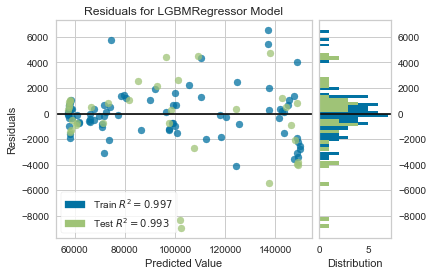

In [27]:
plot_model(tuned_lightgbm)

### 10.2 예측 오차 도표 Prediction Error Plot

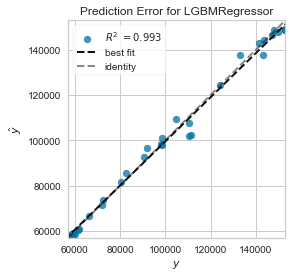

In [28]:
plot_model(tuned_lightgbm, plot = 'error')

### 10.3 특징 중요도 도표 Feature Importance Plot

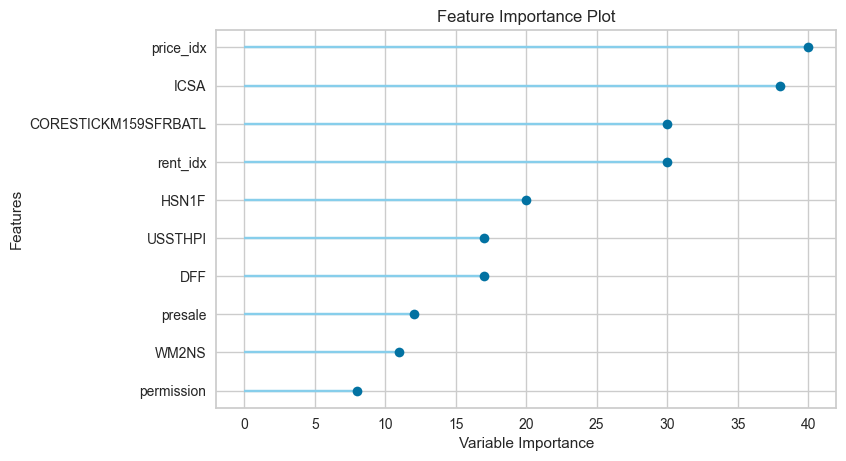

In [29]:
plot_model(tuned_lightgbm, plot='feature')

모델의 성능을 분석하는 또 다른evaluate_model() 방법 은 주어진 모델에 대해 사용 가능한 모든 플롯에 대한 사용자 인터페이스를 표시하는 기능을 사용하는 것입니다. 내부적으로 plot_model()함수를 사용합니다.

In [30]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 11.0 테스트/홀드아웃 샘플에 대한 예측  Predict on Test / Hold-out Sample

모델을 완성하기 전에 테스트/홀드아웃 세트를 예측하고 평가 메트릭을 검토하여 최종 확인을 한 번 수행하는 것이 좋습니다. 

앞서 set up 정보를 보면 데이터의 30%(1621개 샘플)가 테스트/홀드아웃 샘플로 분리되었음을 알 수 있습니다.

위에서 본 모든 평가 메트릭은 훈련 세트(70%)만을 기반으로 교차 검증된 결과입니다. 이제 변수에 저장된 최종 훈련된 모델을 사용 tuned_lightgbm하여 홀드아웃 샘플을 예측하고 메트릭을 평가하여 CV 결과와 실질적으로 다른지 확인합니다.

In [31]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2155.1125,9289984.9734,3047.9477,0.9926,0.0280,0.0210


테스트/홀드아웃 세트의 R2는 CV 결과에서 달성된 0.9728것과 비교됩니다 . 이것은 중요한 차이가 아닙니다. 

테스트/홀드아웃과 CV 결과 사이에 큰 변동이 있는 경우 일반적으로 과적합을 나타내지만 여러 다른 요인으로 인한 것일 수도 있으므로 추가 조사가 필요합니다. 

이 경우, 우리는 모델을 마무리하고 TEST 데이터(처음에 우리가 분리했고 PyCaret에 노출되지 않은 10%)에 대한 예측으로 진행할 것입니다.0.9753tuned_lightgbm

(TIP : create_model()를 사용할 때 CV 결과의 표준편차를 항상 살펴보는 것이 좋습니다 .)

# 12.0 최종 모델 완성 Finalize Model for Deployment

모델 완성은 실험의 마지막 단계입니다. 
PyCaret의 일반적인 기계 학습 워크플로는 로 시작하여 하이퍼파라미터 튜닝, 앙상블, 스태킹 등과 같은 여러 모델링 기술을 수행하기 위해 몇 가지 후보 모델 setup()을 사용하여 모든 모델을 비교 하고 후보 목록에 추가합니다. 

이 워크플로는 결국 compare_models()새로운 데이터와 보이지 않는 데이터를 예측하는 데 사용할 수 있는 최상의 모델로 안내합니다. 

이 finalize_model()기능은 테스트/홀드아웃 샘플(이 경우 30%)을 포함한 전체 데이터 세트에 모델을 맞춥니다. 이 기능의 목적은 프로덕션에 배포하기 전에 전체 데이터 세트에서 모델을 훈련시키는 것입니다.

In [32]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [33]:
#Final Light Gradient Boosting Machine 매개변수 확인
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['price_idx', 'rent_idx',
                                             'permission', 'presale', 'DFF',
                                             'NASDAQCOM', 'CSUSHPISA',
                                             'CORESTICKM159SFRBATL', 'HSN1F',
                                             'USSTHPI', 'GDP', 'WM2NS',
                                             'ICSA'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=123))])


주의: 마지막으로 주의할 말씀입니다. finalize_model()를 사용하여 모델이 완성되면 finalize_model()테스트/홀드아웃 세트를 포함한 전체 데이터 세트가 학습에 사용됩니다. 

따라서 finalize_model가 사용된 후 홀드아웃 세트에 대한 예측에 모델이 사용되는 경우, 모델링에 사용 finalize_model()된 동일한 데이터에 대해 예측을 시도할 때 인쇄된 정보 그리드가 오해의 소지가 있습니다.

In [34]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,528.5856,506108.5782,711.4131,0.9996,0.0067,0.0053


모델이 동일하더라도 의 R2가 에서 로 어떻게 final_lightgbm증가 했는지 주목하십시오 . 이는 변수가 테스트/홀드아웃 세트를 포함한 전체 데이터 세트에서 훈련되기 때문입니다.0.98890.9728final_lightgbmㅡ

# 13.0 보이지 않는 데이터에 대한 예측 Predict on Unseen Data

이 predict_model()함수는 최종 TEST 데이터 세트를 예측하는 데 사용됩니다. 

바로 finalize_model() 함수와 유일한 차이점은 이번에는 data_unseen매개변수(TEST 데이터 셋)를 전달한다는 것입니다. 

data_unseen튜토리얼 시작 부분에서 생성된 변수이며 PyCaret에 노출되지 않은 원본 데이터 세트의 10%(600개 샘플)를 포함합니다.

In [35]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,832.2646,916345.7824,957.2595,0.9993,0.0104,0.0089


,price_idx,rent_idx,permission,presale,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price,prediction_label
0,55.460407,67.051109,4375.0,886.0,0.10,4458.649902,164.574005,2.100809,402.0,342.769989,17804.228516,11332.900391,308000.0,57284,58659.235932
1,56.129501,67.651085,5539.0,1303.0,0.07,4580.270020,165.904007,1.954047,470.0,342.769989,17804.228516,11432.400391,303000.0,57805,57367.607088
2,56.337124,68.379181,7315.0,2836.0,0.07,4630.740234,167.334000,2.004366,442.0,345.540009,17912.078125,11516.299805,280000.0,58153,57534.775474
3,56.292858,68.867607,3441.0,171.0,0.13,4727.350098,168.048996,1.971126,497.0,345.540009,17912.078125,11659.799805,291000.0,58173,58521.499209
4,58.264107,72.213478,15593.0,288.0,0.13,5013.120117,172.128006,2.141448,506.0,360.059998,18401.626953,11947.400391,275000.0,60382,60515.527819


Label열이 세트에 추가 됩니다 data_unseen. final_lightgbm레이블은 모델 을 사용하여 예측된 값 입니다. round예측을 반올림하려면 내부에 매개변수 를 사용할 수 있습니다 

In [40]:
from pycaret.utils.generic import check_metric
check_metric(unseen_predictions.gangnam_price, unseen_predictions.prediction_label, 'R2')

0.9993

# 14.0 모델 저장 Saving the Model

이제 변수 tuned_lightgbm에 저장되어 있는 모델을 마무리하여 실험을 마쳤습니다 . final_lightgbm또한 에 저장된 모델을 사용 final_lightgbm하여 예측을 완료했습니다. 

[실무 포인트] : 모델을 한번 만들어 놓았는데 새로운 데이터가 계속 들어온다면??
예측할 새 데이터가 더 많아지면 어떻게 됩니까? 모델을 계속 만들어야 하나? 

대답은 아니오입니다. PyCaret의 내장 기능 save_model()을 사용하면 나중에 사용할 수 있도록 전체 변환 파이프라인과 함께 모델을 저장할 수 있습니다.

In [41]:
save_model(final_lightgbm,'Final LightGBM Model 4Feb2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['price_idx', 'rent_idx',
                                              'permission', 'presale', 'DFF',
                                              'NASDAQCOM', 'CSUSHPISA',
                                              'CORESTICKM159SFRBATL', 'HSN1F',
                                              'USSTHPI', 'GDP', 'WM2NS',
                                              'ICSA'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  LGBMRegressor(n_jobs=-1, random_state=123))]),
 'Final LightGBM Model 4Feb2024.pkl')

(TIP : 모델을 저장할 때 항상 파일 이름에 날짜를 사용하는 것이 좋으며, 버전 관리에 좋습니다.)

# 15.0 저장된 모델 불러오기 Loading the Saved Model

동일한 또는 대체 환경에서 미래 날짜에 저장된 모델을 로드하려면 PyCaret의 load_model()기능을 사용한 다음 예측을 위해 보이지 않는 새로운 데이터에 저장된 모델을 쉽게 적용할 것입니다.

In [42]:
saved_final_lightgbm = load_model('Final LightGBM Model 4Feb2024')

Transformation Pipeline and Model Successfully Loaded


predict_model()모델이 환경에 로드되면 동일한 기능 을 사용하여 새 데이터를 예측하는 데 간단히 사용할 수 있습니다 . 아래에서는 위에서 사용한 것과 동일한 데이터인 data_unseen을 사용했습니다.(실제는 새로운 데이터 일것임).
로드된 모델을 적용합니다.

In [43]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,832.2646,916345.7824,957.2595,0.9993,0.0104,0.0089


In [44]:
new_prediction.head()

,price_idx,rent_idx,permission,presale,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price,prediction_label
0,55.460407,67.051109,4375.0,886.0,0.10,4458.649902,164.574005,2.100809,402.0,342.769989,17804.228516,11332.900391,308000.0,57284,58659.235932
1,56.129501,67.651085,5539.0,1303.0,0.07,4580.270020,165.904007,1.954047,470.0,342.769989,17804.228516,11432.400391,303000.0,57805,57367.607088
2,56.337124,68.379181,7315.0,2836.0,0.07,4630.740234,167.334000,2.004366,442.0,345.540009,17912.078125,11516.299805,280000.0,58153,57534.775474
3,56.292858,68.867607,3441.0,171.0,0.13,4727.350098,168.048996,1.971126,497.0,345.540009,17912.078125,11659.799805,291000.0,58173,58521.499209
4,58.264107,72.213478,15593.0,288.0,0.13,5013.120117,172.128006,2.141448,506.0,360.059998,18401.626953,11947.400391,275000.0,60382,60515.527819


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

In [46]:
from pycaret.utils.generic import check_metric
check_metric(unseen_predictions.gangnam_price, unseen_predictions.prediction_label, 'R2')

0.9993

# 16.0 마무리 Wrap-up / Next Steps?

지금까지 데이터 수집, 사전 처리, 모델 교육, 하이퍼파라미터 조정, 예측 및 나중에 사용할 수 있도록 모델 저장에서 전체 기계 학습 파이프라인을 다뤘습니다. 

compare_models(), create_model(), tune_model()와 같이 자연스럽게 구성되고 기억하기 매우 직관적인 10개 미만의 명령으로 이 모든 단계를 완료했습니다 .

PyCaret 없이 전체 실험을 다시 생성하려면 대부분의 라이브러리에서 100줄 이상의 코드가 필요합니다.

PyCaret이라는  AUTO ML을 배웠지만, 반드시 만능열쇠는 아닙니다.
데이터 분석 본래 목적과 그 원리를 안다면 Tool은 중요하지 않습니다.

데이터 분석과 데이터 사이언스를 통해 현실/실무에서의 인사이트를 찾아내고,
생산성 향상과 새로운 가치 창출이라는 본래 목적을 잊지 마시기 바랍니다.

감사합니다.

## 더 공부하고 싶으시다면

- __회귀 자습서(REG102) - 중급 수준 [Regression Tutorial (REG102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)__
- __회귀 튜토리얼(REG103) - 레벨 전문가 [Regression Tutorial (REG103) - Level Expert](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Expert%20-%20REG103.ipynb)__